In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
url = 'https://bit.ly/2JRmGC2'
df = pd.read_csv(url, na_values=-1)
df['calories_per_cup'] = df['calories']/df['cups']

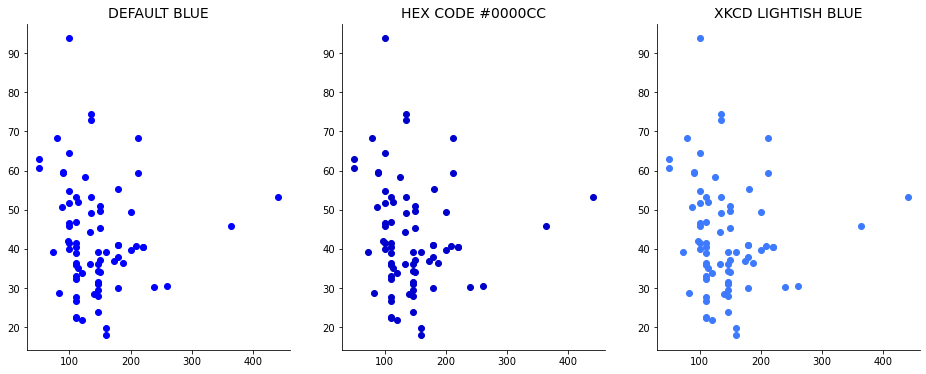

In [5]:
plt.figure(figsize=(16, 6))

#Default
plt.subplot(1, 3, 1)
plt.scatter(df['calories_per_cup'], df['rating'], color='blue')
plt.title("DEFAULT BLUE", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Update with hex code
plt.subplot(1, 3, 2)
plt.scatter(df['calories_per_cup'], df['rating'], color='#0000cc')
plt.title("HEX CODE #0000CC", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

#Update with xkcd
plt.subplot(1, 3, 3)
plt.scatter(df['calories_per_cup'], df['rating'], color='xkcd:lightish blue')
plt.title("XKCD LIGHTISH BLUE", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

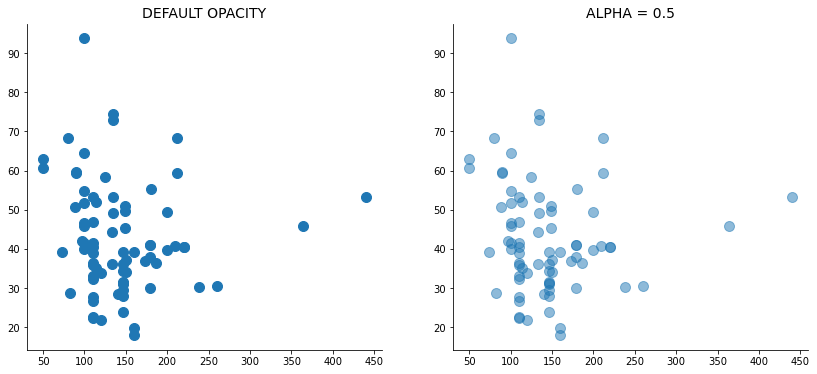

In [6]:
plt.figure(figsize=(14, 6))

#Default
plt.subplot(1, 2, 1)
plt.scatter(df['calories_per_cup'], df['rating'], s=100)
plt.title("DEFAULT OPACITY", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Reduced opacity
plt.subplot(1, 2, 2)
plt.scatter(df['calories_per_cup'], df['rating'], alpha=0.5, s=100)  
plt.title("ALPHA = 0.5", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

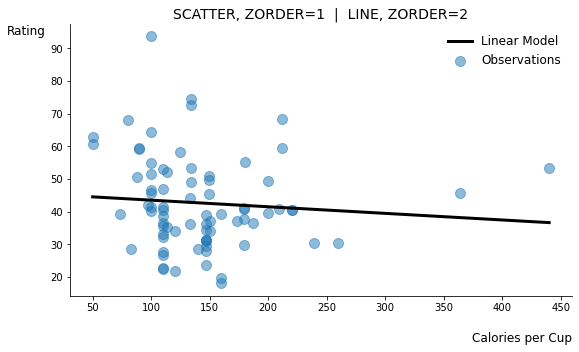

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.array(df['calories_per_cup']).reshape(-1, 1), df['rating'])

m = lr.coef_[0]
b = lr.intercept_

x = np.linspace(df.calories_per_cup.min(), df.calories_per_cup.max(), 1000)
y = m*x + b



plt.figure(figsize=(9, 5))

#Control layer order with zorder
plt.scatter(df['calories_per_cup'], df['rating'], alpha=0.5, s=100, zorder=1)
plt.plot(x, y, lw=3, color='black', zorder=2)

plt.xlabel('\nCalories per Cup', 
           fontsize=12,
           position=(0.9, 0)
          )
plt.ylabel('Rating', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='right',
           position=(-.1, .95)
          )
plt.title("SCATTER, ZORDER=1  |  LINE, ZORDER=2", fontsize=14)

plt.legend(['Linear Model', 'Observations'], fontsize=12, frameon=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

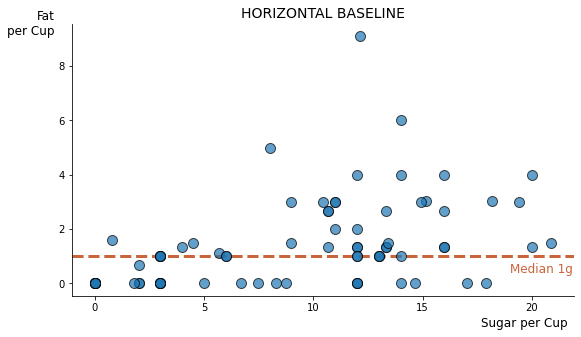

In [9]:
df['sugars_per_cup'] = df.sugars/df.cups
df['fat_per_cup'] = df.fat/df.cups

plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=2, edgecolor='black')

#Horizontal Baseline
plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')

plt.xlabel('Sugar per Cup', 
           fontsize=12,
           position=(.9, .1)
          )
plt.ylabel('Fat\nper Cup', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='right',
           position=(-.1, .95)
          )
plt.title('HORIZONTAL BASELINE', 
          fontsize=14
         )

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
  
#Annotate baseline
plt.annotate(f'Median {df.fat_per_cup.median():.0f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );

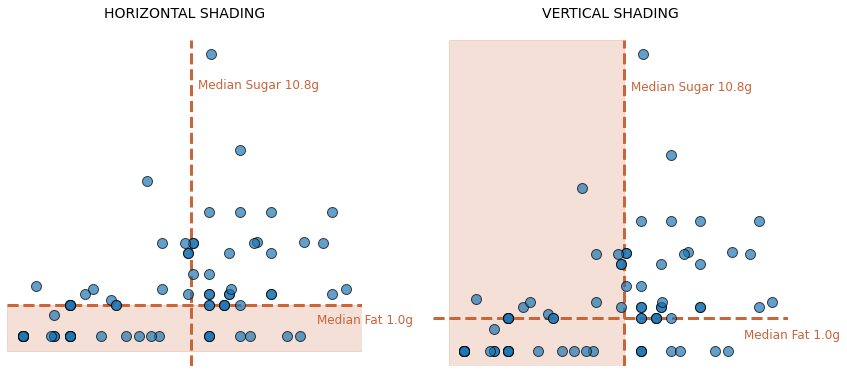

In [10]:
plt.figure(figsize=(14, 6))

#HORIZONTAL
plt.subplot(1, 2, 1)
plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=3, edgecolor='black')

#Horizontal Span Shading
plt.axhspan(-0.5, df['fat_per_cup'].median(), alpha=0.2, 
            zorder=1, color='xkcd:terra cotta')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')

plt.title('HORIZONTAL SHADING\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            );


#VERTICAL
plt.subplot(1, 2, 2)
plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=3, edgecolor='black')

#Vertical Span Shading
plt.axvspan(-1, df['sugars_per_cup'].median(), alpha=0.2, 
            zorder=1, color='xkcd:terra cotta')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')

plt.title('VERTICAL SHADING\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            );

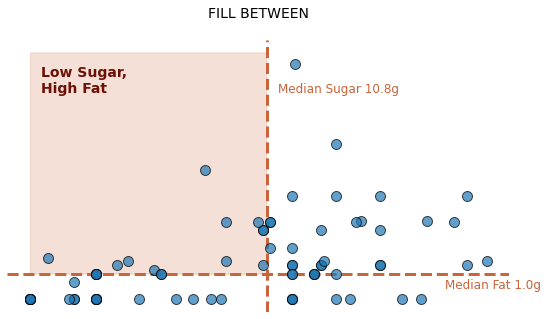

In [11]:
sugars = np.linspace(df.sugars_per_cup.min(), df.sugars_per_cup.max(), 1000)

plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=3, edgecolor='black')

#Fill Between
plt.gca().fill_between(sugars, df['fat_per_cup'].median(), df['fat_per_cup'].max()*1.05, 
                       where=sugars < df['sugars_per_cup'].median(),
                       alpha=0.2, zorder=1, color='xkcd:terra cotta'
                      )

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')

plt.title('FILL BETWEEN\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            )
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            )
plt.annotate(f'Low Sugar,\nHigh Fat', 
             (0.5, 8), 
             fontsize=14,
             fontweight='bold',
             color='xkcd:reddy brown'
            );